# Libraries Used

In [1]:
import numpy as np   
import pandas as pd    # Used for Dataframes. 
import matplotlib.pyplot as plt

# Reading the Entire Dataset

In [2]:
## Reading the CSV File.

# Reading this CSV is done a liitle differently as there is ";" instead ","(Comma).
# Postprocessing to make the proper Dataframe is in the next Cell. 

df = pd.read_csv('BX-Book-Ratings.csv',sep='delimiter') # Reading the CSV File

C:\Users\Me\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:
## Preprocessing to form the proper Dataset.

series = df['"User-ID";"ISBN";"Book-Rating"'].astype(str)  # Converting into Series to perform the operations

df = pd.DataFrame(series.str.split(';',expand=True)) # Splitting the Series(strings) with a delimeter (';')

df.columns = ['User-ID', 'ISBN', 'Ratings'] # Changing the Column Name

In [4]:
## Removing the  '""' from each column and converting them into intergers. 

df['User-ID'] = df['User-ID'].map(lambda x: x.lstrip('"').rstrip('"'))
df['ISBN'] = df['ISBN'].map(lambda x: x.lstrip('"').rstrip('"'))
df['Ratings'] = df['Ratings'].map(lambda x: x.lstrip('"').rstrip('"'))

df['User-ID'] = df['User-ID'].astype(int)
df['Ratings'] = df['Ratings'].astype(int)
df['ISBN'] = df['ISBN'].astype(str)

In [5]:
## Outputting the Ratings Data Frame

ratings_df = df

ratings_df.head()

,User-ID,ISBN,Ratings
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
## Reading the CSV File.

# Reading this CSV is done a liitle differently as there is ";" instead ","(Comma).

books_df = pd.read_csv('BX-Books.csv',sep=';', error_bad_lines = False, encoding = "latin-1") # Reading the CSV File

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\Me\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2

In [7]:
## Reading the CSV File.

# Reading this CSV is done a liitle differently as there is ";" instead ","(Comma). 

users_df = pd.read_csv('BX-Users.csv',sep=';', error_bad_lines = False, encoding = "latin-1") # Reading the CSV File

# Building the Dataset (Based on the Year Published)

## This is done because performing this algorithm on the entire Dataset will be very expensive

In [8]:
## Outputting the New Books Data Frame


# Outliers and Mistakes in the Dataset

a = books_df.loc[books_df['Year-Of-Publication'] == 'DK Publishing Inc']

b = a.index.values

books_df['Year-Of-Publication'].iloc[b] = 2000 

a = books_df.loc[books_df['Year-Of-Publication'] == 'Gallimard']

b = a.index.values

books_df['Year-Of-Publication'].iloc[b] = 2003

books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)

books_df = books_df.sort_values(by=['Year-Of-Publication'])

books_df = books_df.sort_values(by='Year-Of-Publication',ascending = False).reset_index()

books_df

,index,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...
1,80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...
2,116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...
3,255409,068471809X,To Have and Have Not,Ernest Hemingway,2037,Simon &amp; Schuster,http://images.amazon.com/images/P/068471809X.0...,http://images.amazon.com/images/P/068471809X.0...,http://images.amazon.com/images/P/068471809X.0...
4,55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030,Aladdin,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...
5,78168,0870449842,Crossing America,National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...
6,260974,0671740989,FOOTBALL SUPER TEAMS : FOOTBALL SUPER TEAMS,Bill Gutman,2030,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0671740989.0...,http://images.amazon.com/images/P/0671740989.0...,http://images.amazon.com/images/P/0671740989.0...
7,192993,0870446924,"Field Guide to the Birds of North America, 3rd...",National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...
8,240169,0684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,2030,Collier Books,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...
9,228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon &amp; Schuster,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...


In [9]:
books1_df = books_df.drop(books_df[books_df['Year-Of-Publication'] < 2004].index)

# Number of Books we choose = 4499
books1_df = books1_df.iloc[0:4499]

books1_df.shape

(4499, 9)

# ONLY EXECUTE IF YOU WANT TO DOWNLOAD THE BOOK COVER

## Book covers have been downloaded and will be used from the system

In [ ]:
## Downloading the book Covers

import urllib.request

## Path for storing them
poster_path = "/Users/Me/Documents/UPENN_COURSEWORK/Machine_Learning_CIS520/Project/Project_framework/Covers"

for i in range(4499):
    print(i)
    s = poster_path + "/image" + str(i) + ".jpg"
    urllib.request.urlretrieve(books1_df['Image-URL-L'].iloc[i], s)

# DOWNLOAD COMPLETE!

# VGG16 Framework Begins

# Libraries Used

In [ ]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image as kimage

# Function for performing the Framework

## Perform only if Similarity Matrix is Required. After Completing Store in a CSV

In [ ]:
def VGG16_sim(total_books):
    img = [0]*total_books
    x = [0]*total_books
    pred = [0]*total_books
    matrix_res = np.zeros([total_books,25088])
    model = VGG16(include_top=False, weights='imagenet')
    cover_path = 'C:\\Users\\Me\\Documents\\UPENN_COURSEWORK\\Machine_Learning_CIS520\\Project\\Project_framework\\Covers\\image'
    for i in range(total_books):
        print(i)
        img[i] = kimage.load_img(cover_path + str(i) + ".jpg", target_size=(224, 224))
        x[i] = kimage.img_to_array(img[i])
        x[i] = np.expand_dims(x[i], axis=0)
        x[i] = preprocess_input(x[i])
        pred[i] = model.predict(x[i]).ravel()
        matrix_res[i,:] = pred[i]
    
    sim = matrix_res.dot(matrix_res.T)
    norms = np.array([np.sqrt(np.diagonal(sim))])
    sim = sim / norms / norms.T 
    
    return sim

In [ ]:
total_books = 4499

sim = VGG16_sim(total_books)

# Saving to a CSV File

In [ ]:
sim_df = pd.DataFrame(sim)

sim_df.to_csv('sim_dataframe.csv', sep=',')

# Reading from Stored CSV File

In [12]:
sim_df = pd.read_csv('sim_dataframe.csv')

sim_df = sim_df.drop(['Unnamed: 0'], axis=1)

sim_df

,0,1,2,3,4,5,6,7,8,9,...,4489,4490,4491,4492,4493,4494,4495,4496,4497,4498
0,1.000000,1.000000,1.000000,1.000000,1.000000,0.098854,0.073320,0.032618,1.000000,1.000000,...,0.019793,0.025607,0.139241,0.037435,0.076288,0.014955,0.031575,0.050001,0.123199,0.125253
1,1.000000,1.000000,1.000000,1.000000,1.000000,0.098854,0.073320,0.032618,1.000000,1.000000,...,0.019793,0.025607,0.139241,0.037435,0.076288,0.014955,0.031575,0.050001,0.123199,0.125253
2,1.000000,1.000000,1.000000,1.000000,1.000000,0.098854,0.073320,0.032618,1.000000,1.000000,...,0.019793,0.025607,0.139241,0.037435,0.076288,0.014955,0.031575,0.050001,0.123199,0.125253
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.098854,0.073320,0.032618,1.000000,1.000000,...,0.019793,0.025607,0.139241,0.037435,0.076288,0.014955,0.031575,0.050001,0.123199,0.125253
4,1.000000,1.000000,1.000000,1.000000,1.000000,0.098854,0.073320,0.032618,1.000000,1.000000,...,0.019793,0.025607,0.139241,0.037435,0.076288,0.014955,0.031575,0.050001,0.123199,0.125253
5,0.098854,0.098854,0.098854,0.098854,0.098854,1.000000,0.290768,0.063605,0.098854,0.098854,...,0.145662,0.095775,0.254240,0.074479,0.284290,0.169620,0.124966,0.228905,0.213582,0.127934
6,0.073320,0.073320,0.073320,0.073320,0.073320,0.290768,1.000000,0.055344,0.073320,0.073320,...,0.168002,0.106912,0.143763,0.097865,0.185180,0.157004,0.097573,0.136852,0.178736,0.124867
7,0.032618,0.032618,0.032618,0.032618,0.032618,0.063605,0.055344,1.000000,0.032618,0.032618,...,0.064008,0.094900,0.058362,0.121157,0.082066,0.124915,0.070807,0.085863,0.055030,0.080169
8,1.000000,1.000000,1.000000,1.000000,1.000000,0.098854,0.073320,0.032618,1.000000,1.000000,...,0.019793,0.025607,0.139241,0.037435,0.076288,0.014955,0.031575,0.050001,0.123199,0.125253
9,1.000000,1.000000,1.000000,1.000000,1.000000,0.098854,0.073320,0.032618,1.000000,1.000000,...,0.019793,0.025607,0.139241,0.037435,0.076288,0.014955,0.031575,0.050001,0.123199,0.125253


In [13]:
sim = sim_df.values

sim

array([[1.        , 1.        , 1.        , ..., 0.05000115, 0.12319939,
        0.12525332],
       [1.        , 1.        , 1.        , ..., 0.05000115, 0.12319939,
        0.12525332],
       [1.        , 1.        , 1.        , ..., 0.05000115, 0.12319939,
        0.12525332],
       ...,
       [0.05000115, 0.05000115, 0.05000115, ..., 1.        , 0.16777082,
        0.12078953],
       [0.12319939, 0.12319939, 0.12319939, ..., 0.16777082, 1.        ,
        0.09914523],
       [0.12525332, 0.12525332, 0.12525332, ..., 0.12078953, 0.09914523,
        1.        ]])

# Predictions

In [16]:
from IPython.display import Image
from IPython.display import display
from IPython.display import HTML

# Function for Prediction

In [29]:
# sim = sim matrix
# book_id for which we want the recommendation for 
# z = number of books

def pred(sim,book_id,z):
    pred_row = sim[book_id,:]
    
    predictions = pred_row.argsort()[-z:][::-1]
    
    cover_path = 'C:\\Users\\Me\\Documents\\UPENN_COURSEWORK\\Machine_Learning_CIS520\\Project\\Project_framework\\Covers\\image'
    
    for i in range(z):
        
        s = cover_path + str(predictions[i]) + '.jpg'
        
        display(Image(filename=s,width=100, height=20))
    
    return predictions

# EXAMPLE 1:

# Shows the Nature of words in the image (DUMMIES) [Feature]

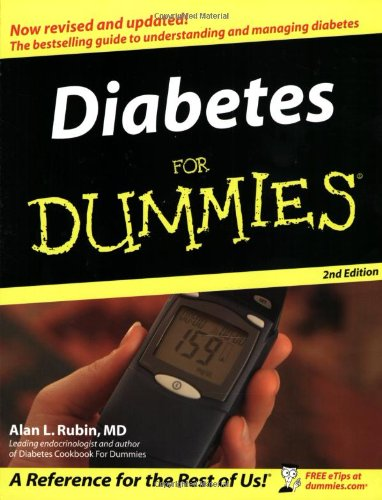

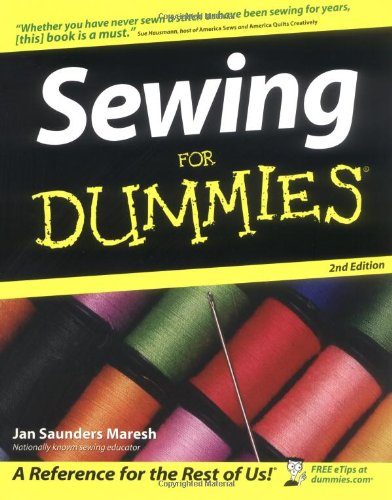

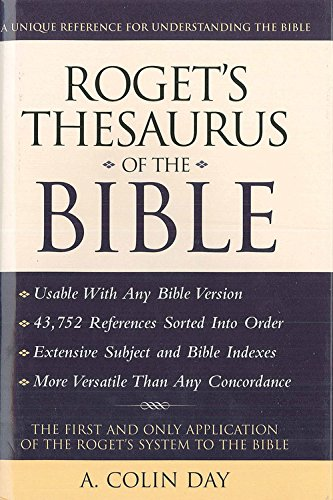

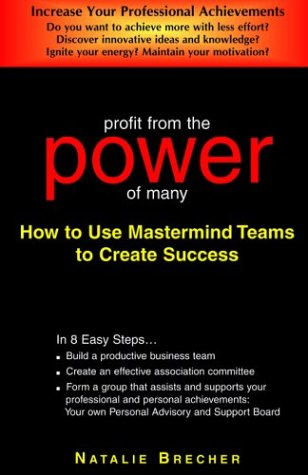

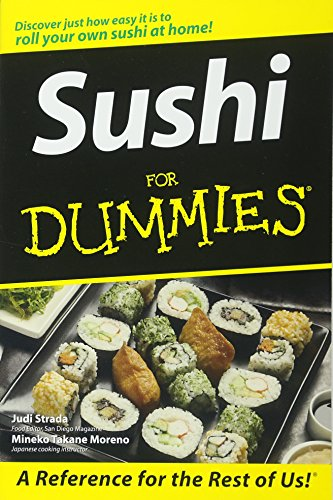

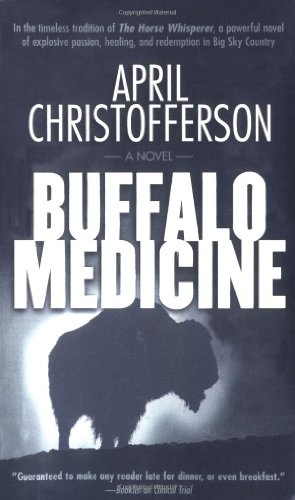

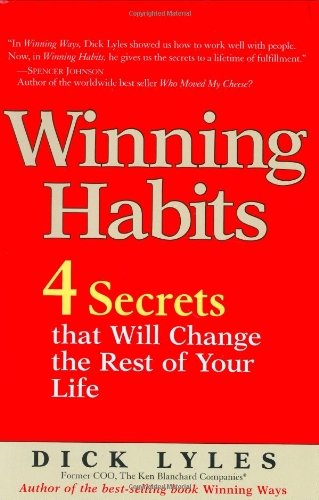

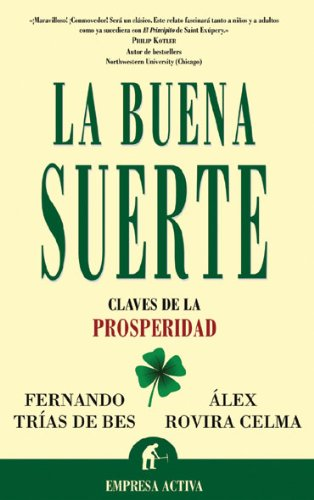

In [31]:
predictions = pred(sim,189,8)

# EXAMPLE 2:

# Based on the Author 

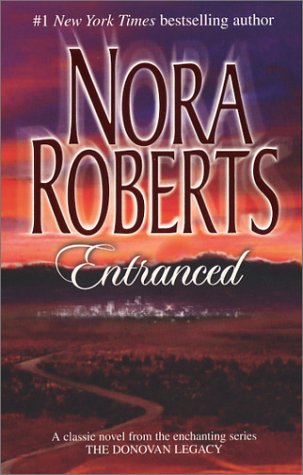

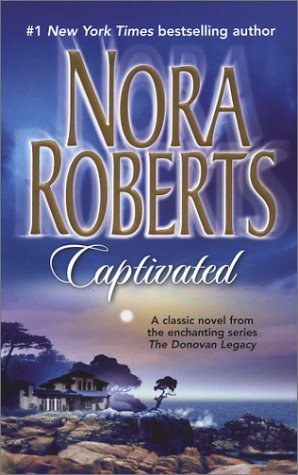

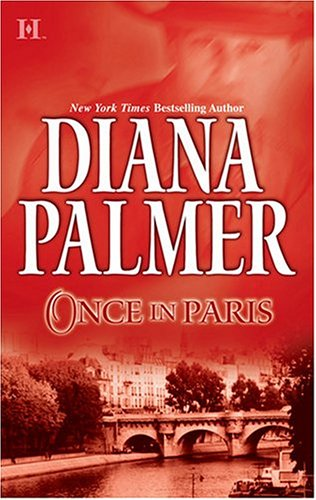

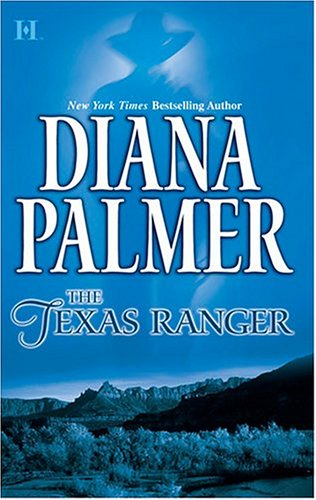

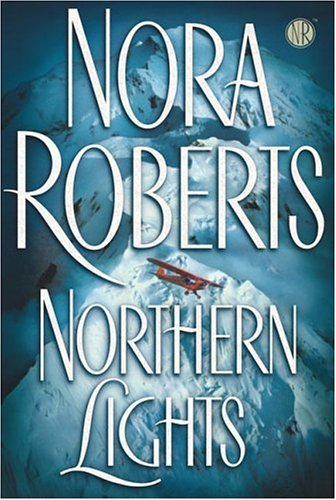

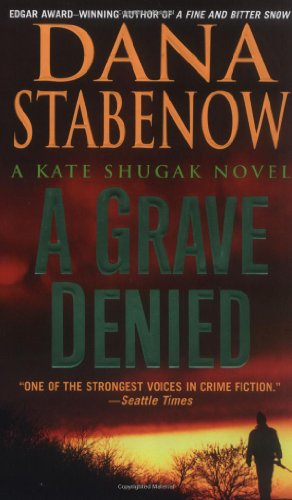

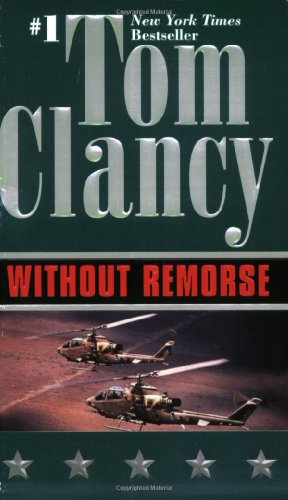

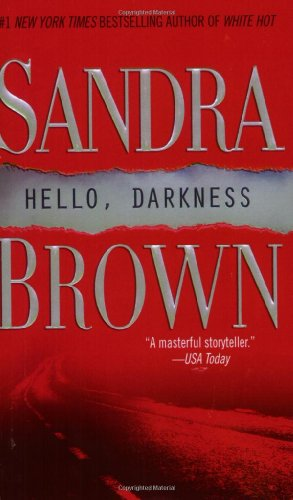

In [32]:
predictions = pred(sim,876,8)

# EXAMPLE 3:

# Based on the Features Extracted by the Face

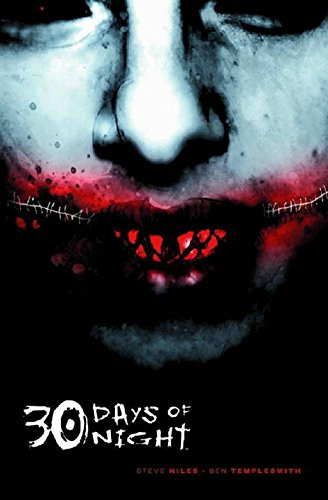

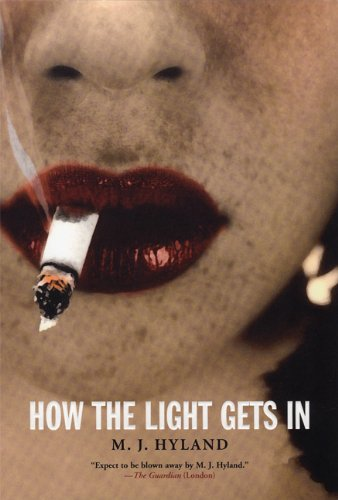

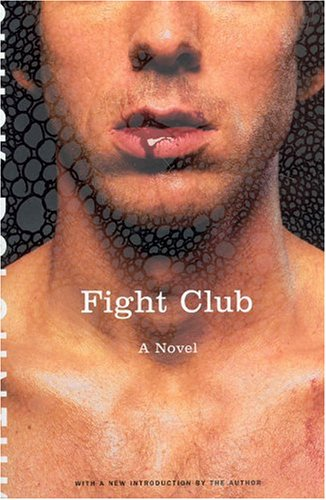

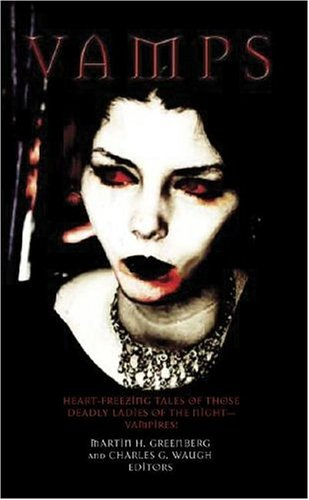

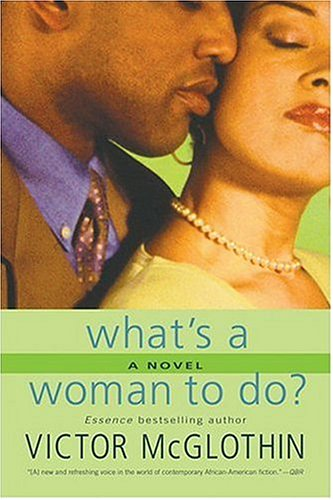

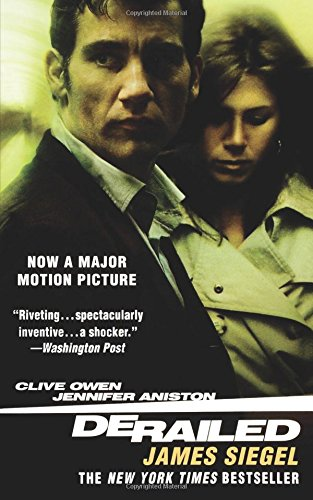

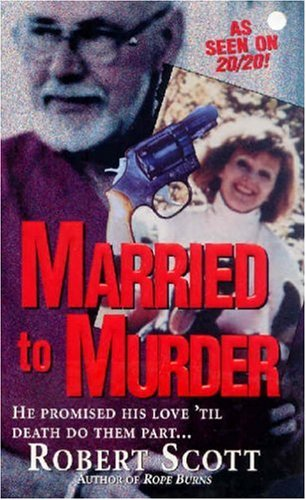

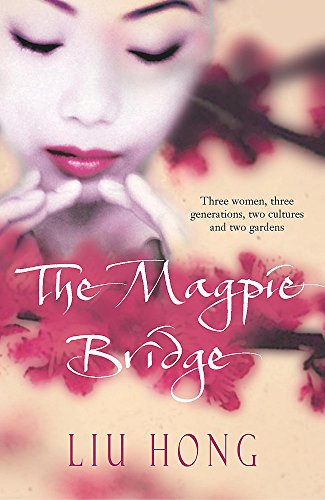

In [33]:
predictions = pred(sim,1415,8)